# Data Insight: Top Factors For Startup Success

Building a successful startup is hard. Statistics show that [90% of startups fail](https://www.failory.com/blog/startup-failure-rate). So, what are the main factors that make successful startups?

In this article, we will explore the [Startup Success Prediction dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction) released on [Kaggle](https://www.kaggle.com/) to find data insights on the success of startups.

This dataset contains information about industries, acquisitions, and investment details of nearly a thousand startups based in the USA from the 1980s to 2013.

To be able to extract interesting trends from data, it's essential to understand how to transform raw data into meaningful information. To achieve this goal, we will perform the following steps: 
1. Data exploration
2. Pre-processing 
3. Data analysis 
4. Data-driven conclusions

Here are the main questions we will answer:
- In which industries are startup acquisitions most common?
- Does reaching certain milestones increase a startup's chance of being acquired?
- What is the average total funding for startups that get acquired versus those that fail?
- How do success rates compare between startups with Series A, B, or C funding and those supported by angel investors or venture capitalists?

Let's begin by understanding some concepts related to startups.

## Understanding the Startup Ecosystem
Startups raise money in stages called **funding rounds**, like Series A, B, or C. These rounds enables the startups to invest in the necessary resources for their growth

Startups set goals called **milestones**, like launching a product or getting a certain number of users. These reflect their performance to the investors.

Finally, startups secure funding from two types of source:
- **Angel investors** are individuals who provide personal capital for investment.
- **Venture capital firms** are corporate entities specializing startup investments.

Now that you understand the context, let's start the data exploration.

## Data Exploration

Data exploration is the first step in data analysis. It involves examining datasets to identify patterns and anomalies. 

The following libraries provide the necessary tools and functions for data manipulation, analysis, and visualization.

In [66]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import zscore

Next, we load the data into a [Pandas](https://pandas.pydata.org/) dataframe.

In [67]:
file_path = os.path.join('..', 'data', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [68]:
columns_to_copy = ["status", "state_code", "category_code"]
categorical_data = data_df[columns_to_copy].copy()

The `status` variable is the most important feature in this dataset. This binary variable indicates whether a startup has been acquired or closed.

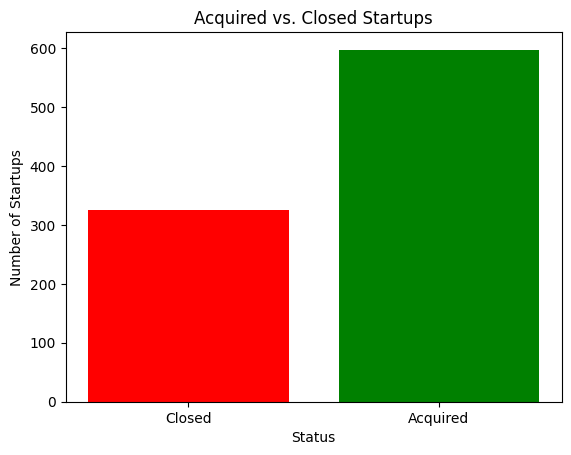

In [69]:
# Creating a DataFrame
df = pd.DataFrame(data_df)

# Creating a binary variable
df['binary_status'] = df['status'].map({'acquired': 1, 'closed': 0})

# Counting the occurrences of each status
status_counts = df['binary_status'].value_counts()

# Plotting the bar plot
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Closed','Acquired'])
plt.xlabel('Status')
plt.ylabel('Number of Startups')
plt.title('Acquired vs. Closed Startups')
plt.show()

When analyzing the variable, it shows that 597 startups in our dataset were acquired, while 326 startups closed down.

With the target variable identified, let's proceed to data preparation.

## Data Pre-processing

The pre-processing step involves cleaning and organizing the raw data.
We'll accomplish following these steps:

The **Data cleaning** step consists on identifying and correcting data errors, such as typos, duplicates, or incorrect entries. It is essential for maintaining data integrity. We'll focus on handling:
-  The irrelevant features
-  The missing values
-  The negative values where it shouldn't be so.

The **Data transformation** step modifies data to re-organize them into a format appropriate for performing analysis. These are the common transformation that we will perform:
-  **Normalization** and **standardization**: These techniques adjust data to a common scale, making it easier to compare them.
-  **Encoding categorical data**: Transforming categorical variables into numerical formats.


### Handle Irrelevant Features

An irrelevant feature is a data attribute or variable that doesn't offer useful or meaningful information for the task. Here are some reasons why removing them is beneficial:

- Eliminating irrelevant variables simplifies the analysis process.
- It ensures focus on meaningful factors by reducing unnecessary information and improving clarity in data exploration.

To continue, we'll remove the following variables and explain why for each.

In [70]:
data_df = data_df.drop([
    'Unnamed: 0',   # Irrelevant data
    'latitude',     # Irrelevant data
    'longitude',    # Irrelevant data
    'zip_code',     # Irrelevant data
    'id',           # Irrelevant data
    'Unnamed: 6',   # Irrelevant data
    'name',         # Irrelevant data
    'labels',       # Same data as status
    'state_code.1', # Same data as state_code
    'is_CA',        # Binary column, not needed 
    'is_NY',        # Binary column, not needed
    'is_MA',        # Binary column, not needed
    'is_TX',        # Binary column, not needed
    'is_otherstate',# Binary column, not needed
    'is_software',  # Binary column, not needed
    'is_web',       # Binary column, not needed
    'is_mobile',    # Binary column, not needed
    'is_enterprise',# Binary column, not needed
    'is_advertising',# Binary column, not needed
    'is_gamesvideo',# Binary column, not needed
    'is_ecommerce', # Binary column, not needed
    'is_biotech',   # Binary column, not needed
    'is_consulting',# Binary column, not needed
    'is_othercategory',# Binary column, not needed
    'object_id'],   # Irrelevant data
    axis=1,
).copy()
data_df.head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.00,0,acquired
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.75,1,acquired


We've simplified the DataFrame. From 50 columns initially, it now contains 24 columns. Let's examine the data.

In [71]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   city                      923 non-null    object 
 2   founded_at                923 non-null    object 
 3   closed_at                 335 non-null    object 
 4   first_funding_at          923 non-null    object 
 5   last_funding_at           923 non-null    object 
 6   age_first_funding_year    923 non-null    float64
 7   age_last_funding_year     923 non-null    float64
 8   age_first_milestone_year  771 non-null    float64
 9   age_last_milestone_year   771 non-null    float64
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  category_c

A preliminary review allows us to understand the nature of the data, especially focusing on identifying key data types that will help us to make decisions.
After discarding irrelevant variables we continue handle the Missing values.

 ### Missing Values

Missing values (NA) are data points in a dataset where information is simply not available or recorded for a specific attribute or variable. 

Importance of **handling** missing values:

- Preserve the integrity of your dataset. Without proper handling, NA can lead to biased or misleading results in statistical analyses. 
 
- Maintain the reliability of your analyses, making them more robust and trustworthy.

In [72]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
status                        0
dtype: int64

It's important to remember that handling NA varies based on data characteristics and analysis goals. The chosen method should be tailored to each case.

As shown above, we've identified **three features** that contain missing values.

Given that `age_first_milestone_year` and `age_last_milestone_year` are continuous numerical variables, our chosen imputation method will involve filling the missing values with the respective means for these variables. To accomplish this, we will apply the following method.

 **Fillna() Method** provides:

- Flexibility in handling missing data by replacing NaN values with custom alternatives, like specific numbers, text, or computed values.
  
This method works well for continuous numerical variables and retains the original distribution by centering values around the data's central tendency.

In [73]:
data_df["age_first_milestone_year"] = data_df["age_first_milestone_year"].fillna(data_df["age_first_milestone_year"].mean())
data_df["age_last_milestone_year"] = data_df["age_last_milestone_year"].fillna(data_df["age_last_milestone_year"].mean())

In [74]:
data= data_df.isnull().sum()
data.sort_values(ascending=False)

closed_at                   588
state_code                    0
milestones                    0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
category_code                 0
funding_total_usd             0
city                          0
funding_rounds                0
relationships                 0
age_last_milestone_year       0
age_first_milestone_year      0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
status                        0
dtype: int64

**General Changes:**

- Imputed values for `age_first_milestone_year` and `age_last_milestone_year`.
  
- Missing values in `closed_at` represent startups that are still open and will not be filled for now. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date. 
  
Now that we've established the significance of handling missing values, let's proceed with the next step.

### Negative values

Negative values can be important indicators, especially in financial data where they often represent debt or losses. Removing them without careful consideration could result in missing critical information. 

However, in other contexts, negative numbers might indicate errors or require changes to the data.

Before we continue, we will convert the following columns into datetime format to ensure that they are suitable for time based analysis.

In [75]:
data_df.founded_at=pd.to_datetime(data_df.founded_at)
data_df.first_funding_at=pd.to_datetime(data_df.first_funding_at)
data_df.last_funding_at=pd.to_datetime(data_df.last_funding_at)

To find negative values, we'll use **box plots**. Box plots make it easy to spot and fix negative values that could be mistakes or unusual data.

According to our data set, most of the features are binary which are not suitable for negative values detection, therefore we will consider only the following continuous variables.

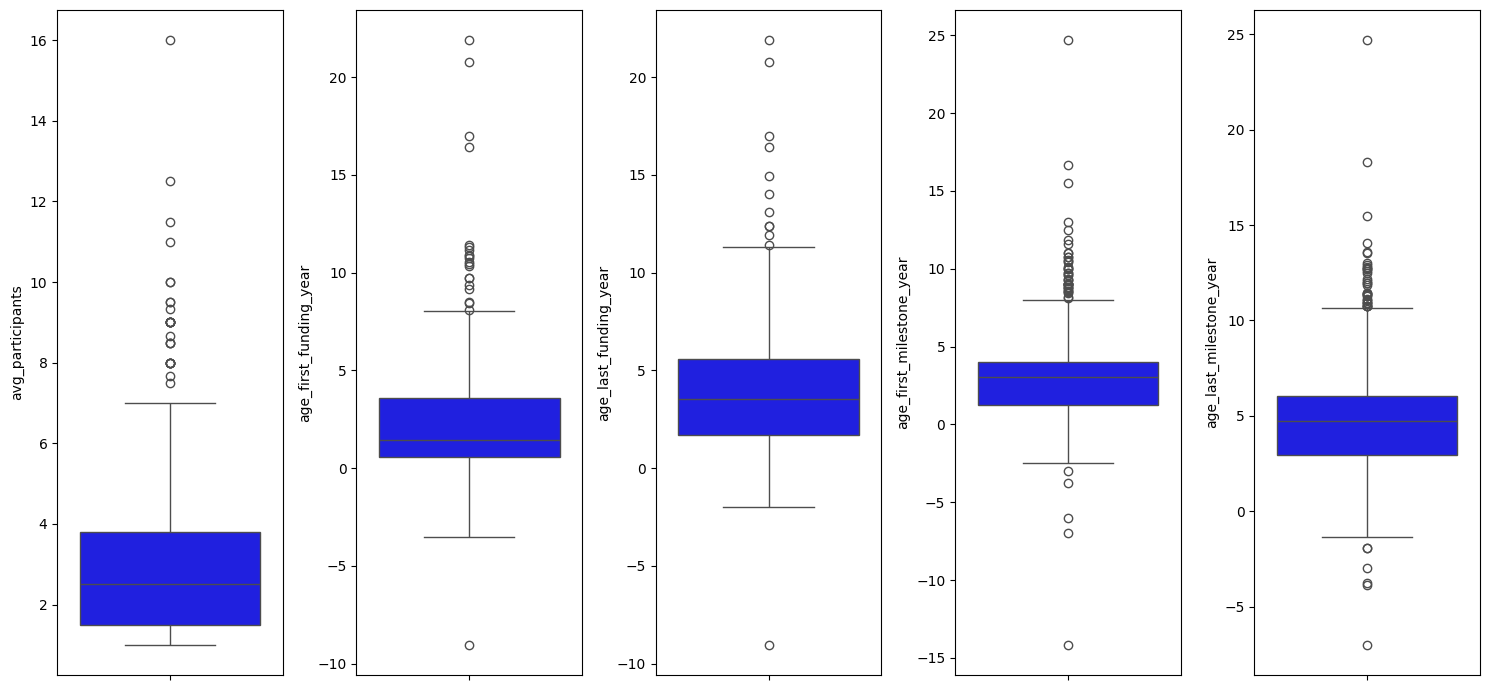

In [76]:
continuous_variables = ['avg_participants','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']
plt.figure(figsize=(15, 7))
for i in range(0, len(continuous_variables)):
    plt.subplot(1, len(continuous_variables), i+1)
    sns.boxplot(y=data_df[continuous_variables[i]], color='blue', orient='v')
    plt.tight_layout()

**Box plots** show us these main observations:
  
- In box plots 2, 3, 4, and 5, the points that appear outside the main body of the box plot represent values that are outside the typical range of the dataset. 

- The points lying above the upper whisker represent the positive outliers. We will address these in a later stage of our analysis.

Let's now look at how two variables relate to each other and spot negative values using scatter plots. 

**Scatter plots** help us see the connection between two variables, making it easier to find unusual points or negative values when we look at them together.

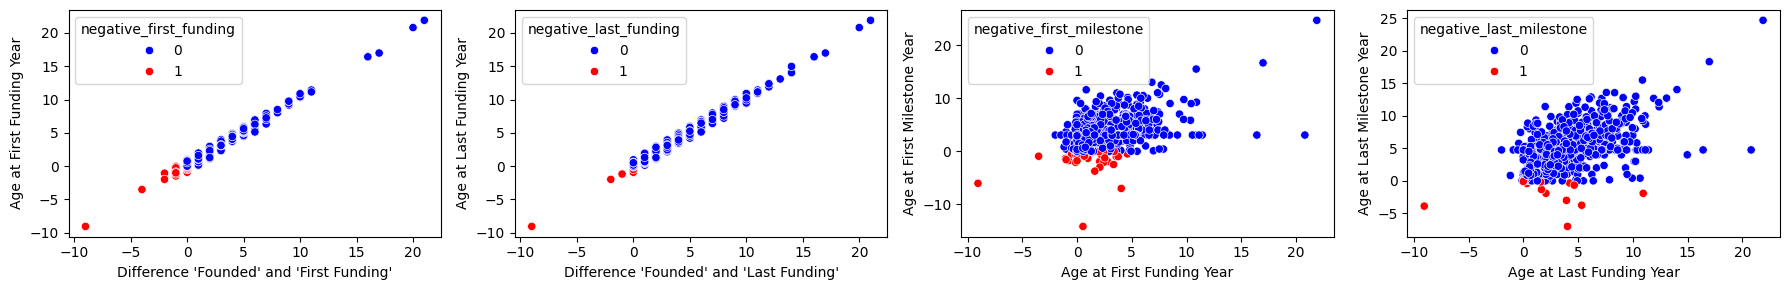

In [77]:
def outliers_analysis(data_df):
    # Perform calculations and add results as new columns in the DataFrame
    data_df['diff_founded_first_funding'] = data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year
    data_df['diff_founded_last_funding'] = data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year

    # Define a custom color palette for negative and non-negative values
    custom_palette = {0: "blue", 1: "red"}

    # Create new columns to identify negative values
    data_df['negative_first_funding'] = (data_df["age_first_funding_year"] < 0).astype(int)
    data_df['negative_last_funding'] = (data_df["age_last_funding_year"] < 0).astype(int)
    data_df['negative_first_milestone'] = (data_df["age_first_milestone_year"] < 0).astype(int)
    data_df['negative_last_milestone'] = (data_df["age_last_milestone_year"] < 0).astype(int)

    plt.figure(figsize=(18, 3), dpi=100)

    # Configuration for each subplot
    plots_config = [
        {
            "x": "diff_founded_first_funding",
            "y": "age_first_funding_year",
            "hue": "negative_first_funding",
            "xlabel": "Difference 'Founded' and 'First Funding'",
            "ylabel": "Age at First Funding Year",
            "data": data_df  # Specify the DataFrame
        },
        {
            "x": "diff_founded_last_funding",
            "y": "age_last_funding_year",
            "hue": "negative_last_funding",
            "xlabel": "Difference 'Founded' and 'Last Funding'",
            "ylabel": "Age at Last Funding Year",
            "data": data_df
        },
        {
            "x": "age_first_funding_year",
            "y": "age_first_milestone_year",
            "hue": "negative_first_milestone",
            "xlabel": "Age at First Funding Year",
            "ylabel": "Age at First Milestone Year",
            "data": data_df
        },
        {
            "x": "age_last_funding_year",
            "y": "age_last_milestone_year",
            "hue": "negative_last_milestone",
            "xlabel": "Age at Last Funding Year",
            "ylabel": "Age at Last Milestone Year",
            "data": data_df
        }
    ]

    # Generate each scatter plot based on the configuration
    for i, config in enumerate(plots_config, start=1):
        plt.subplot(1, 4, i)
        sns.scatterplot(
            x=config["x"], 
            y=config["y"], 
            hue=config["hue"], 
            palette=custom_palette,
            data=config["data"]  
        )
        plt.xlabel(config["xlabel"])
        plt.ylabel(config["ylabel"])

    plt.tight_layout()  # Adjust the layout
    plt.show()

outliers_analysis(data_df)

From the **scatterplot** we identified the following: 

- Negative values are highlighted in red, while positive values are indicated in blue.

- The occurrence of negative values could be attributed to several reasons, such a data entry errors, or a relative timing. However, without definitive context, we cannot be certain of the exact cause.

For the purposes of our analysis, we'll focus on how to handle these negative values. By doing so, we can maintain the integrity of our analysis and ensure that our insights are based on accurate and representative data.

Let's identify which column specifically contains negative values.

In [78]:
columns_to_check  = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in columns_to_check :
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: True
Negative values in 'age_last_funding_year' column: True
Negative values in 'age_first_milestone_year' column: True
Negative values in 'age_last_milestone_year' column: True


#### Handle Negative Values

Once we've identified them, we can proceed to address them with the following function.

**abs()function** is a valuable tool in data manipulation and numerical analysis for quickly and reliably obtaining absolute values. By taking the **absolute values** (converting them to positive values), you remove the negative sign and focus on the magnitude or distance from zero. 

In [79]:
data_df["age_first_funding_year"]=np.abs(data_df["age_first_funding_year"])
data_df["age_last_funding_year"]=np.abs(data_df["age_last_funding_year"])
data_df["age_first_milestone_year"]=np.abs(data_df["age_first_milestone_year"])
data_df["age_last_milestone_year"]=np.abs(data_df["age_last_milestone_year"])

After appliying the function we can use the following code to confirm it.

In [80]:
columns_to_check  = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in columns_to_check :
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: False
Negative values in 'age_last_funding_year' column: False
Negative values in 'age_first_milestone_year' column: False
Negative values in 'age_last_milestone_year' column: False


 In outlier detection or anomaly detection tasks, absolute values can help identify extreme deviations regardless of their direction.

Let's observe how the plot changed after removing negative values.

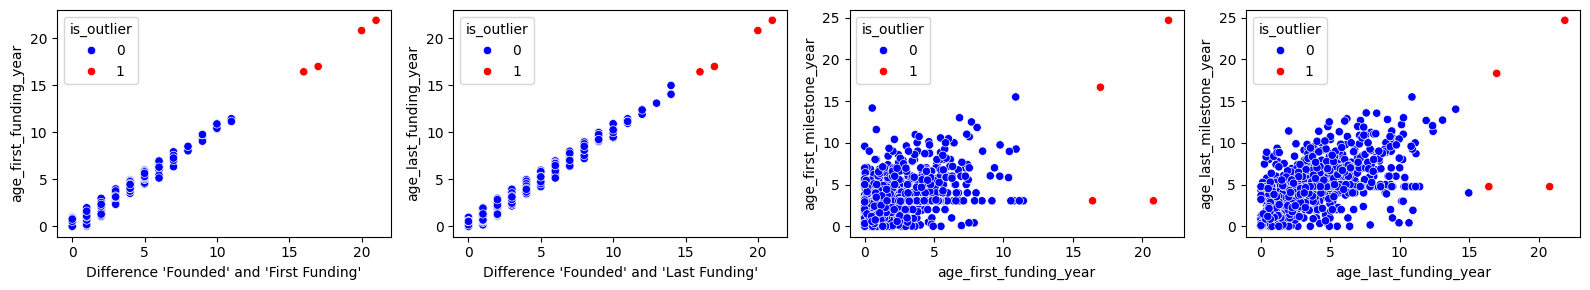

In [81]:
def identify_outliers(data_df):
    threshold = 4  
    column_name = "age_first_funding_year"
    column = data_df[column_name]
    mean = column.mean()
    std = column.std()
    is_outlier = (np.abs(column - mean) > threshold * std)
    data_df['is_outlier'] = is_outlier.astype(int)
    return data_df

data_df = identify_outliers(data_df)

def plot_outlier_scatterplots(data_df):
    custom_palette = {0: "blue", 1: "red"}
    plt.figure(figsize=(16, 3), dpi=100)

    # Plot configurations
    plot_configs = [
        {
            "x": np.abs(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year),
            "y": data_df["age_first_funding_year"],
            "label": "Difference 'Founded' and 'First Funding'"
        },
        {
            "x": np.abs(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year),
            "y": data_df["age_last_funding_year"],
            "label": "Difference 'Founded' and 'Last Funding'"
        },
        {
            "x": data_df["age_first_funding_year"],
            "y": data_df["age_first_milestone_year"],
            "label": None  # No label specified
        },
        {
            "x": data_df["age_last_funding_year"],
            "y": data_df["age_last_milestone_year"],
            "label": None  # No label specified
        }
    ]

    # Create each scatter plot
    for i, config in enumerate(plot_configs, start=1):
        plt.subplot(1, 4, i)
        sns.scatterplot(x=config["x"], y=config["y"], hue=data_df["is_outlier"], palette=custom_palette)
        if config["label"]:
            plt.xlabel(config["label"])

    plt.tight_layout()  #Adjust the layout
    plt.show()

plot_outlier_scatterplots(data_df)

The outcome was a cleaner dataset, with all negative values successfully removed.

This time, we focus on the positive outliers (the red points) that were identified using the **z-score** method in our visualization. Let's proceed to analyze this method in detail.

 ### Outliers

Outliers are extreme values in a dataset.  Earlier, we use methods such as **Box Plot** and **Scatter Plot**.

We will delve into other two methods to identify the outliers:

- **Histograms** to observe data distribution and spot anomalies.
- Statistical methods as **Z-scores**.

By closely looking at the histogram, we can see if there are any data points that are very different from the usual range of values. These outliers often show up as isolated bars or spikes on the histogram.

Let's determine which variables have the highest number of outliers.

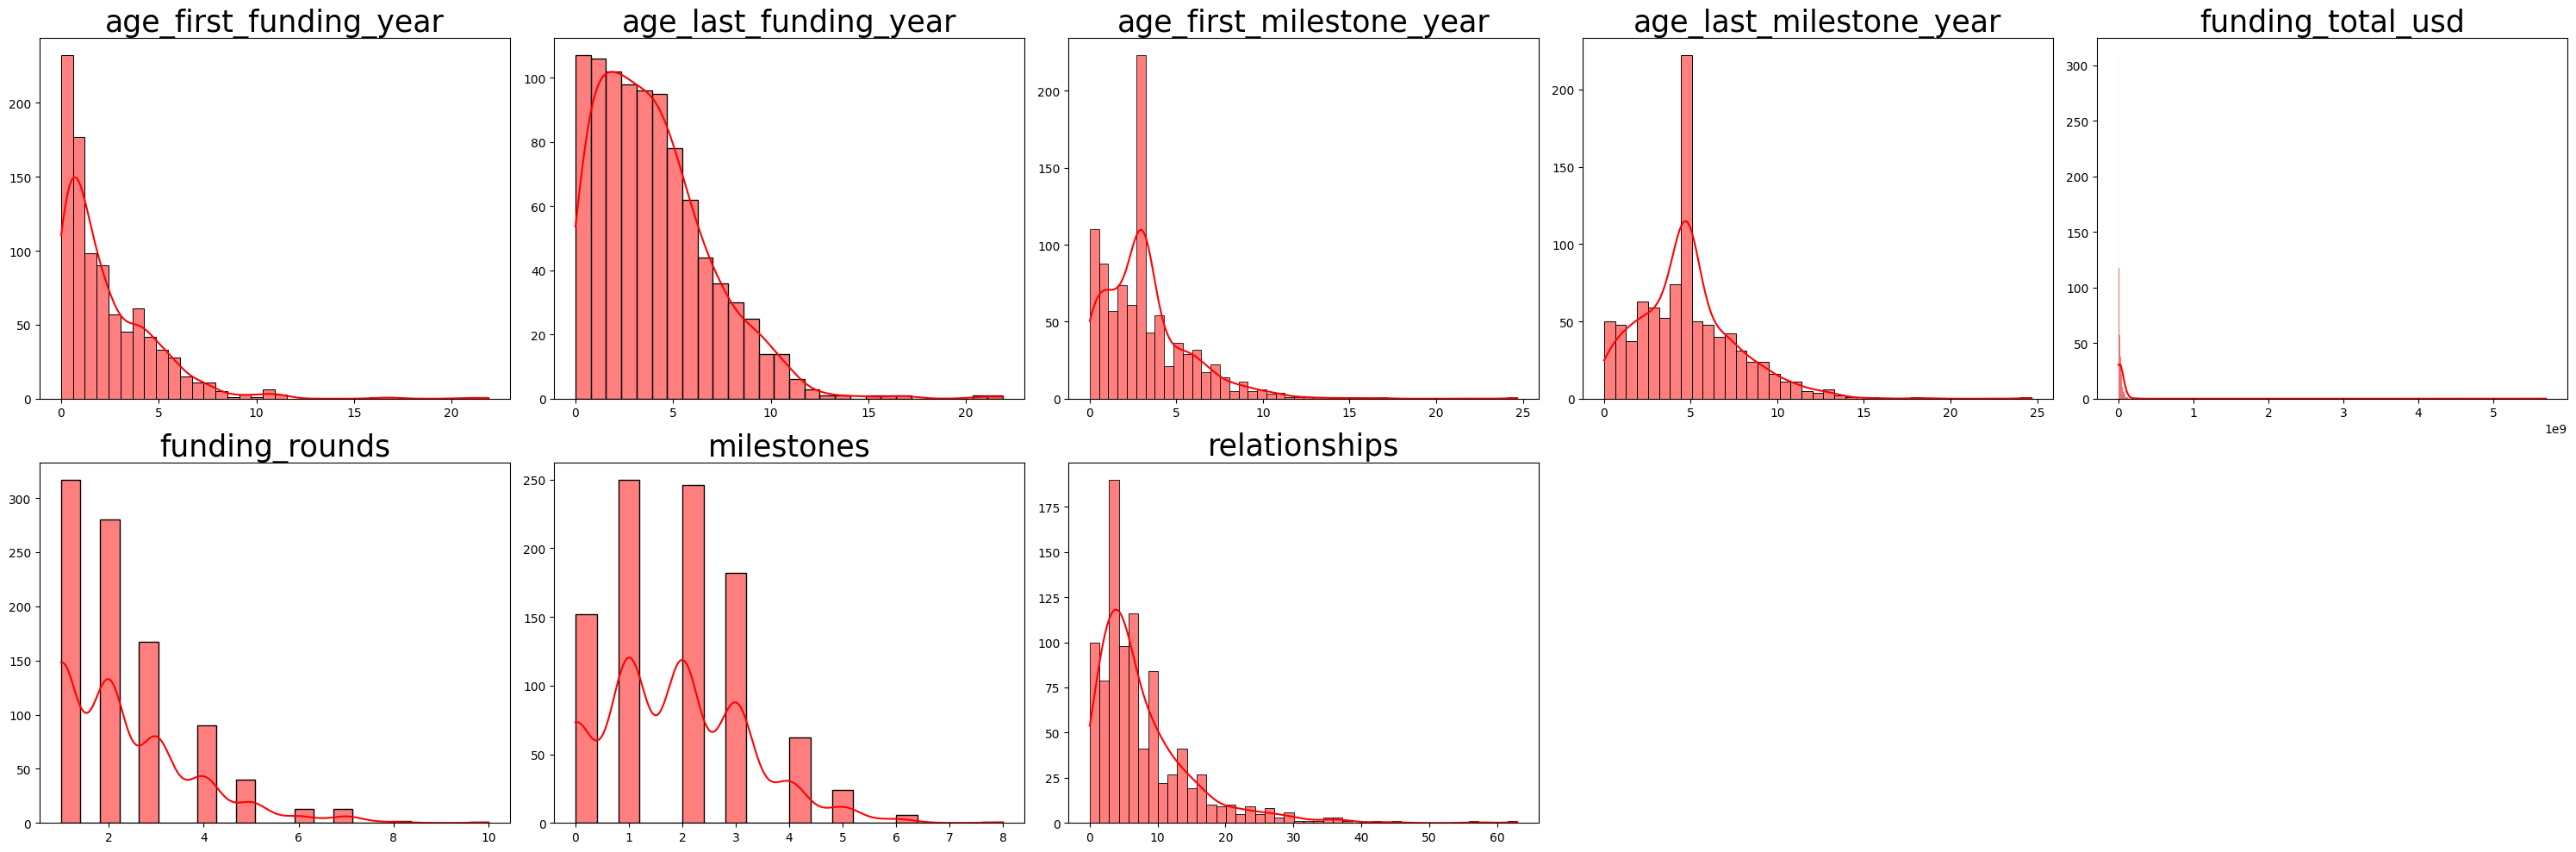

In [82]:
# Select only numeric columns for histogram plots
specific_variables = [
    "age_first_funding_year", "age_last_funding_year",
    "age_first_milestone_year", "age_last_milestone_year", 
    "funding_total_usd", "funding_rounds", 
    "milestones", "relationships"
]
# Determine the number of rows and columns for the subplots
num_variables = len(specific_variables)
num_columns = 5  
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size 
fig_width = num_columns * 6  
fig_height = num_rows * 5    

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(specific_variables):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(data_df[column], color="red", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  
    plt.ylabel('') 

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As observed in the histogram, noticeable spikes are apparent in the data. Excluding binary variables, the variables with the most prominent spikes are:

- `age_first_funding_year` 
- `age_first_milestone_year`
- `age_last_milestone_year`
- `funding_total_usd`
- `relationships`

Lets now determinate how much our dataset is affected by unusual data points. To do that we will use the following function.

**Z-scores** help us see how different a data point is from the average (mean) of the dataset. We will apply this method to one of the columns that has a higher number of outliers `age_first_milestone_year`.

In [83]:
zscores_column =zscore(data_df["age_first_milestone_year"])
for threshold in range(1,6,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores_column >threshold)[0])))

Threshold value: 1
Number of outliers: 135
Threshold value: 2
Number of outliers: 40
Threshold value: 3
Number of outliers: 10
Threshold value: 4
Number of outliers: 4
Threshold value: 5
Number of outliers: 2


Analyzing the z-scores for the `age_first_milestone_year` column demonstrates how lowering z-score thresholds increases outlier detection flexibility to suit specific needs.

Now that we have identified outliers in our data, the next step is normalization. We will utilize the log-transformed method for this purpose.

#### Handle Outliers

To handle this outliers we will use **The log-transformed method** that involves taking the natural logarithm (ln) of each data point in a dataset. It's useful when data has a wide range of values, helping to balance the data.

The following graph illustrates the dataset before and after applying log transformation.

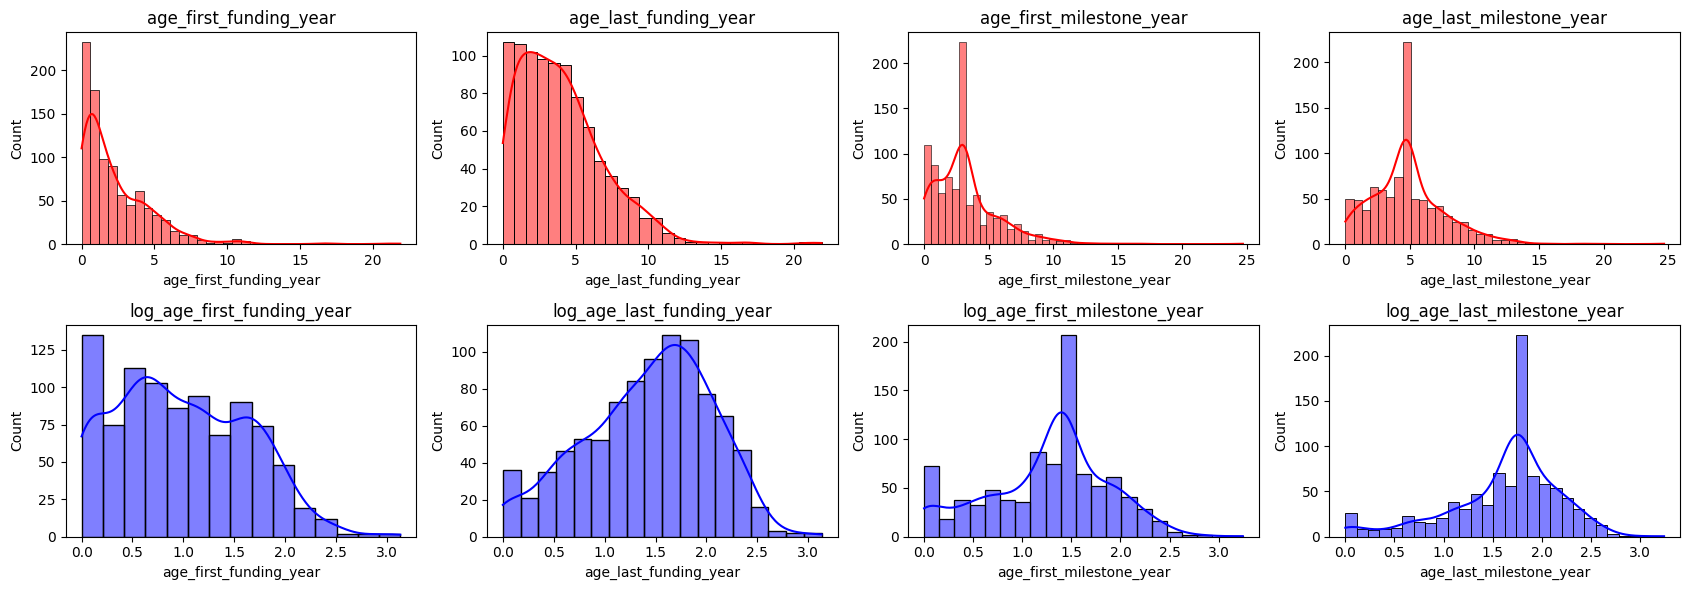

In [84]:
age_features = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(age_features):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_df[variable], color="red", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(data_df[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="blue", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

The distinction is evident; in the blue histogram, the peak is noticeably lower than in the red histogram.

 When you use the logarithm on data, **compresses** the outliers closer to the rest of the values. This makes the distribution of the data look more like a balanced and symmetrical shape, similar to a bell curve. 
 - It's important to note that log transformation doesn't remove outliers entirely; it reduces their impact.
  
Now that we've addressed negative values and outliers, lets quickly inspect the first row of your DataFrame after sorting by index.

In [85]:
data_df.sort_index().head(3)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,avg_participants,is_top500,status,diff_founded_first_funding,diff_founded_last_funding,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1.00,0,acquired,2,3,0,0,0,0,0
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,4.75,1,acquired,5,9,0,0,0,0,0
2,CA,San Diego,2009-03-18,NaN,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,4.00,1,acquired,1,1,0,0,0,0,0


### Creating Variables

In this part, we'll demonstrate how useful it is to **create temporary variables**. The benefits of using temporary variables include ensuring the integrity of the original data, particularly during complex operations. 

Previously, we retained missing values in the `closed_at` variable to preserve information (as certain startups are still active without arbitrarily assigning a closure date). Creating temporary variables allows us to use the data without making modifications to it.

In [86]:
data_df = data_df

#We convert the 'closed_at' column to datetime format, handling any conversion errors. 
data_df['closed_at'] = pd.to_datetime(data_df['closed_at'], errors='coerce')

#Sort DataFrame by 'closed_at' in descending order revealing the most recent startup closures.
data_df = data_df.sort_values(by='closed_at', ascending=False )

#Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]

#Confirm is the right value
print("Last startup closing date:", last_closed_date)

#temporary variable, 'closed_temp,' is created to preserve non-null values of the 'closed_at' column for calculations.
closed_temp = data_df['closed_at'].copy()

#Fill the null values in 'closed_temp' with the last closed date(2013-10-30)
closed_temp.fillna(last_closed_date, inplace=True)

#Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

#Missing values in 'closed_at' are replaced with 'x' to signify operating startups.
data_df['closed_at'] = data_df['closed_at'].fillna(value="x")

#'Missing values in 'closed_at' are replaced with 'x' to signify operating startups.
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)

# Convert 'founded_at' column to datetime objects
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'])

# Extract and format the year from 'founded_at' as 'founded_year'
data_df['founded_year'] = data_df['founded_at'].dt.strftime('%Y')

# Group the DataFrame by 'founded_year' and count occurrences
prop_df = data_df.groupby('founded_year').size().reset_index(name = 'counts')

# Calculate the proportions of startups founded each year
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Last startup closing date: 2013-10-30 00:00:00


To summarize the steps we've taken:


- Create a temporary variable, `closed_temp` to hold non-null values from `closed_at`.
- Fill the null values in `closed_temp` with the last closed date (2013-10-30).
- Calculate the relative age based on `founded_at` and `closed_temp`.
- Replace missing values in `closed_at` with 'x' to indicate operating startups.
- Generate an additional variables named `founded_year` and `proportions` to create visualization.

In [87]:
data_df.sort_index().head(1)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,status,diff_founded_first_funding,diff_founded_last_funding,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_year
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,acquired,2,3,0,0,0,0,0,6.8282,2007


### Transforming Non-numeric Data into Numeric Values

Just like we did with our target variables previously, let's apply the **mapping** technique again to convert the remaining categorical features into numerical ones. 


In [88]:
categorical_columns = ['state_code', 'city', 'category_code','founded_year','status']
# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'NY': 1, 'MI': 2, 'IL': 3, 'NJ': 4, 'OH': 5, 'DC': 6, 'TX': 7, 'CT': 8, 'WA': 9, 'PA': 10, 'MA': 11, 'TN': 12, 'ME': 13, 'ID': 14, 'VA': 15, 'MN': 16, 'NC': 17, 'GA': 18, 'CO': 19, 'FL': 20, 'MD': 21, 'WI': 22, 'AR': 23, 'IN': 24, 'UT': 25, 'AZ': 26, 'KY': 27, 'NM': 28, 'NH': 29, 'RI': 30, 'OR': 31, 'NV': 32, 'MO': 33, 'WV': 34}, 'city': {'Mountain View': 0, 'San Diego': 1, 'New York': 2, 'San Francisco': 3, 'Bingham Farms': 4, 'Chicago': 5, 'Hillsborough': 6, 'Cincinnati': 7, 'Yorba Linda': 8, 'San Jose': 9, 'Fremont': 10, 'Washington': 11, 'Austin': 12, 'Westport': 13, 'Seattle': 14, 'Philadelphia': 15, 'Evanston': 16, 'Champaign': 17, 'Pittsburgh': 18, 'NYC': 19, 'Waltham': 20, 'San Mateo': 21, 'Palo Alto': 22, 'Memphis': 23, 'South San Francisco': 24, 'West Newfield': 25, 'Beverly Hills': 26, 'NY': 27, 'Idaho Falls': 28, 'Burlington': 29, 'Viena': 30, 'Red Bank': 31, 'Toledo': 32, 'Andover': 33, 'Saint Paul': 34, 'Boston': 35, 'Cambridge': 36, 'Canton': 37,

We proceed with converting the **datetime features** to numerical values by transforming each specified column into days.

In [89]:
# Set a reference date. You could choose the earliest date in your dataset or a specific date.
reference_date = data_df[['founded_at', 'first_funding_at', 'last_funding_at']].min().min()

# List of columns to convert
columns_to_convert = ['founded_at', 'first_funding_at', 'last_funding_at']

# Convert each specified column into days since the reference date
for column in columns_to_convert:
    data_df[f'{column}_days'] = (data_df[column] - reference_date).dt.days

# Now, 'founded_at_days', 'first_funding_at_days', and 'last_funding_at_days' are numerical 
 #columns representing the number of days from the reference date.
# 'closed_at' remains unchanged as it is already in numerical format (int64).

# Optionally, you might drop the original datetime columns if they're not needed anymore.
data_df.drop(['founded_at', 'first_funding_at', 'last_funding_at'], axis=1, inplace=True)


## Recap of Data Preprocessing ####

After a comprehensive preprocessing transformation, we will outline the general steps we have taken with our data to improve its quality and gain more accurate insights.

- Filtering Irrelevant Values: We simplified the dataframe by reducing the number of variables from 50 to 24, removing unnecessary ones.

- Handling Missing Values: Identified and managed missing values through imputation techniques.

- Addressing Negative Values: Utilized Box Plot and Scatter Plot methods to detect negative values, then handling them with the np.abs() function.

- Managing Outliers: Employed Histogram and z-score methods for outlier detection and subsequently addressed them using log-transformed technique.

- Temporary Variable Creation: Implemented temporary variables to facilitate complex calculations without altering the original dataset.

- Conversion of Non-numeric Data: Converted non-numeric data into numeric values to improve analytical capabilities and model compatibility.


After finally improving the quality of the data, we can now proceed to the most interesting part: getting some insights.

##  Ignore: (Changes for modeling)

Additionally, by dropping the original datetime columns, the DataFrame becomes more concise and efficient for subsequent modeling tasks.

In [90]:
data_df.sort_index().head(2)

,state_code,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_year,founded_at_days,first_funding_at_days,last_funding_at_days
0,0,1,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,0,0,0,0,0,6.8282,1,8401,9222,9497
1,0,61,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,0,0,0,0,13.8289,9,5844,7715,9493


In [91]:
data_df = data_df.drop(['closed_at'], axis=1).copy()
data_df.head(2)

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_year,founded_at_days,first_funding_at_days,last_funding_at_days
609,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,3,...,1,0,0,0,0,4.2601,0,9339,9283,10194
633,0,1,0.2164,4.8438,0.2164,6.2466,22,5,70000000,5,...,0,0,0,0,0,6.2916,1,8582,8661,10350


In [92]:
data_df = data_df.drop(['age'], axis=1).copy()
data_df.head(2)

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,diff_founded_last_funding,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,founded_year,founded_at_days,first_funding_at_days,last_funding_at_days
609,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,3,...,2,1,0,0,0,0,0,9339,9283,10194
633,0,1,0.2164,4.8438,0.2164,6.2466,22,5,70000000,5,...,5,0,0,0,0,0,1,8582,8661,10350


In [93]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 609 to 922
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_code                  923 non-null    int64  
 1   city                        923 non-null    int64  
 2   age_first_funding_year      923 non-null    float64
 3   age_last_funding_year       923 non-null    float64
 4   age_first_milestone_year    923 non-null    float64
 5   age_last_milestone_year     923 non-null    float64
 6   relationships               923 non-null    int64  
 7   funding_rounds              923 non-null    int64  
 8   funding_total_usd           923 non-null    int64  
 9   milestones                  923 non-null    int64  
 10  category_code               923 non-null    int64  
 11  has_VC                      923 non-null    int64  
 12  has_angel                   923 non-null    int64  
 13  has_roundA                  923 non-nu

In [94]:
# data_df= data_df['status'].map({'acquired': 1, 'closed': 0})

In [95]:
print(data_df['status'])

609    0
633    0
631    0
899    0
741    0
      ..
916    1
917    1
918    1
921    1
922    1
Name: status, Length: 923, dtype: int64


In [96]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (31):
['state_code', 'city', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'diff_founded_first_funding', 'diff_founded_last_funding', 'negative_first_funding', 'negative_last_funding', 'negative_first_milestone', 'negative_last_milestone', 'is_outlier', 'founded_year', 'founded_at_days', 'first_funding_at_days', 'last_funding_at_days']

Categorical Features (0):
[]

Datetime Features (0):
[]

Target Variable (1):
['status']


In [97]:
data_df.to_csv('cleaned_data.csv', index=False) 

##  Data Analysis

### Top 10 Sectors with High Startup Acquisition Rates

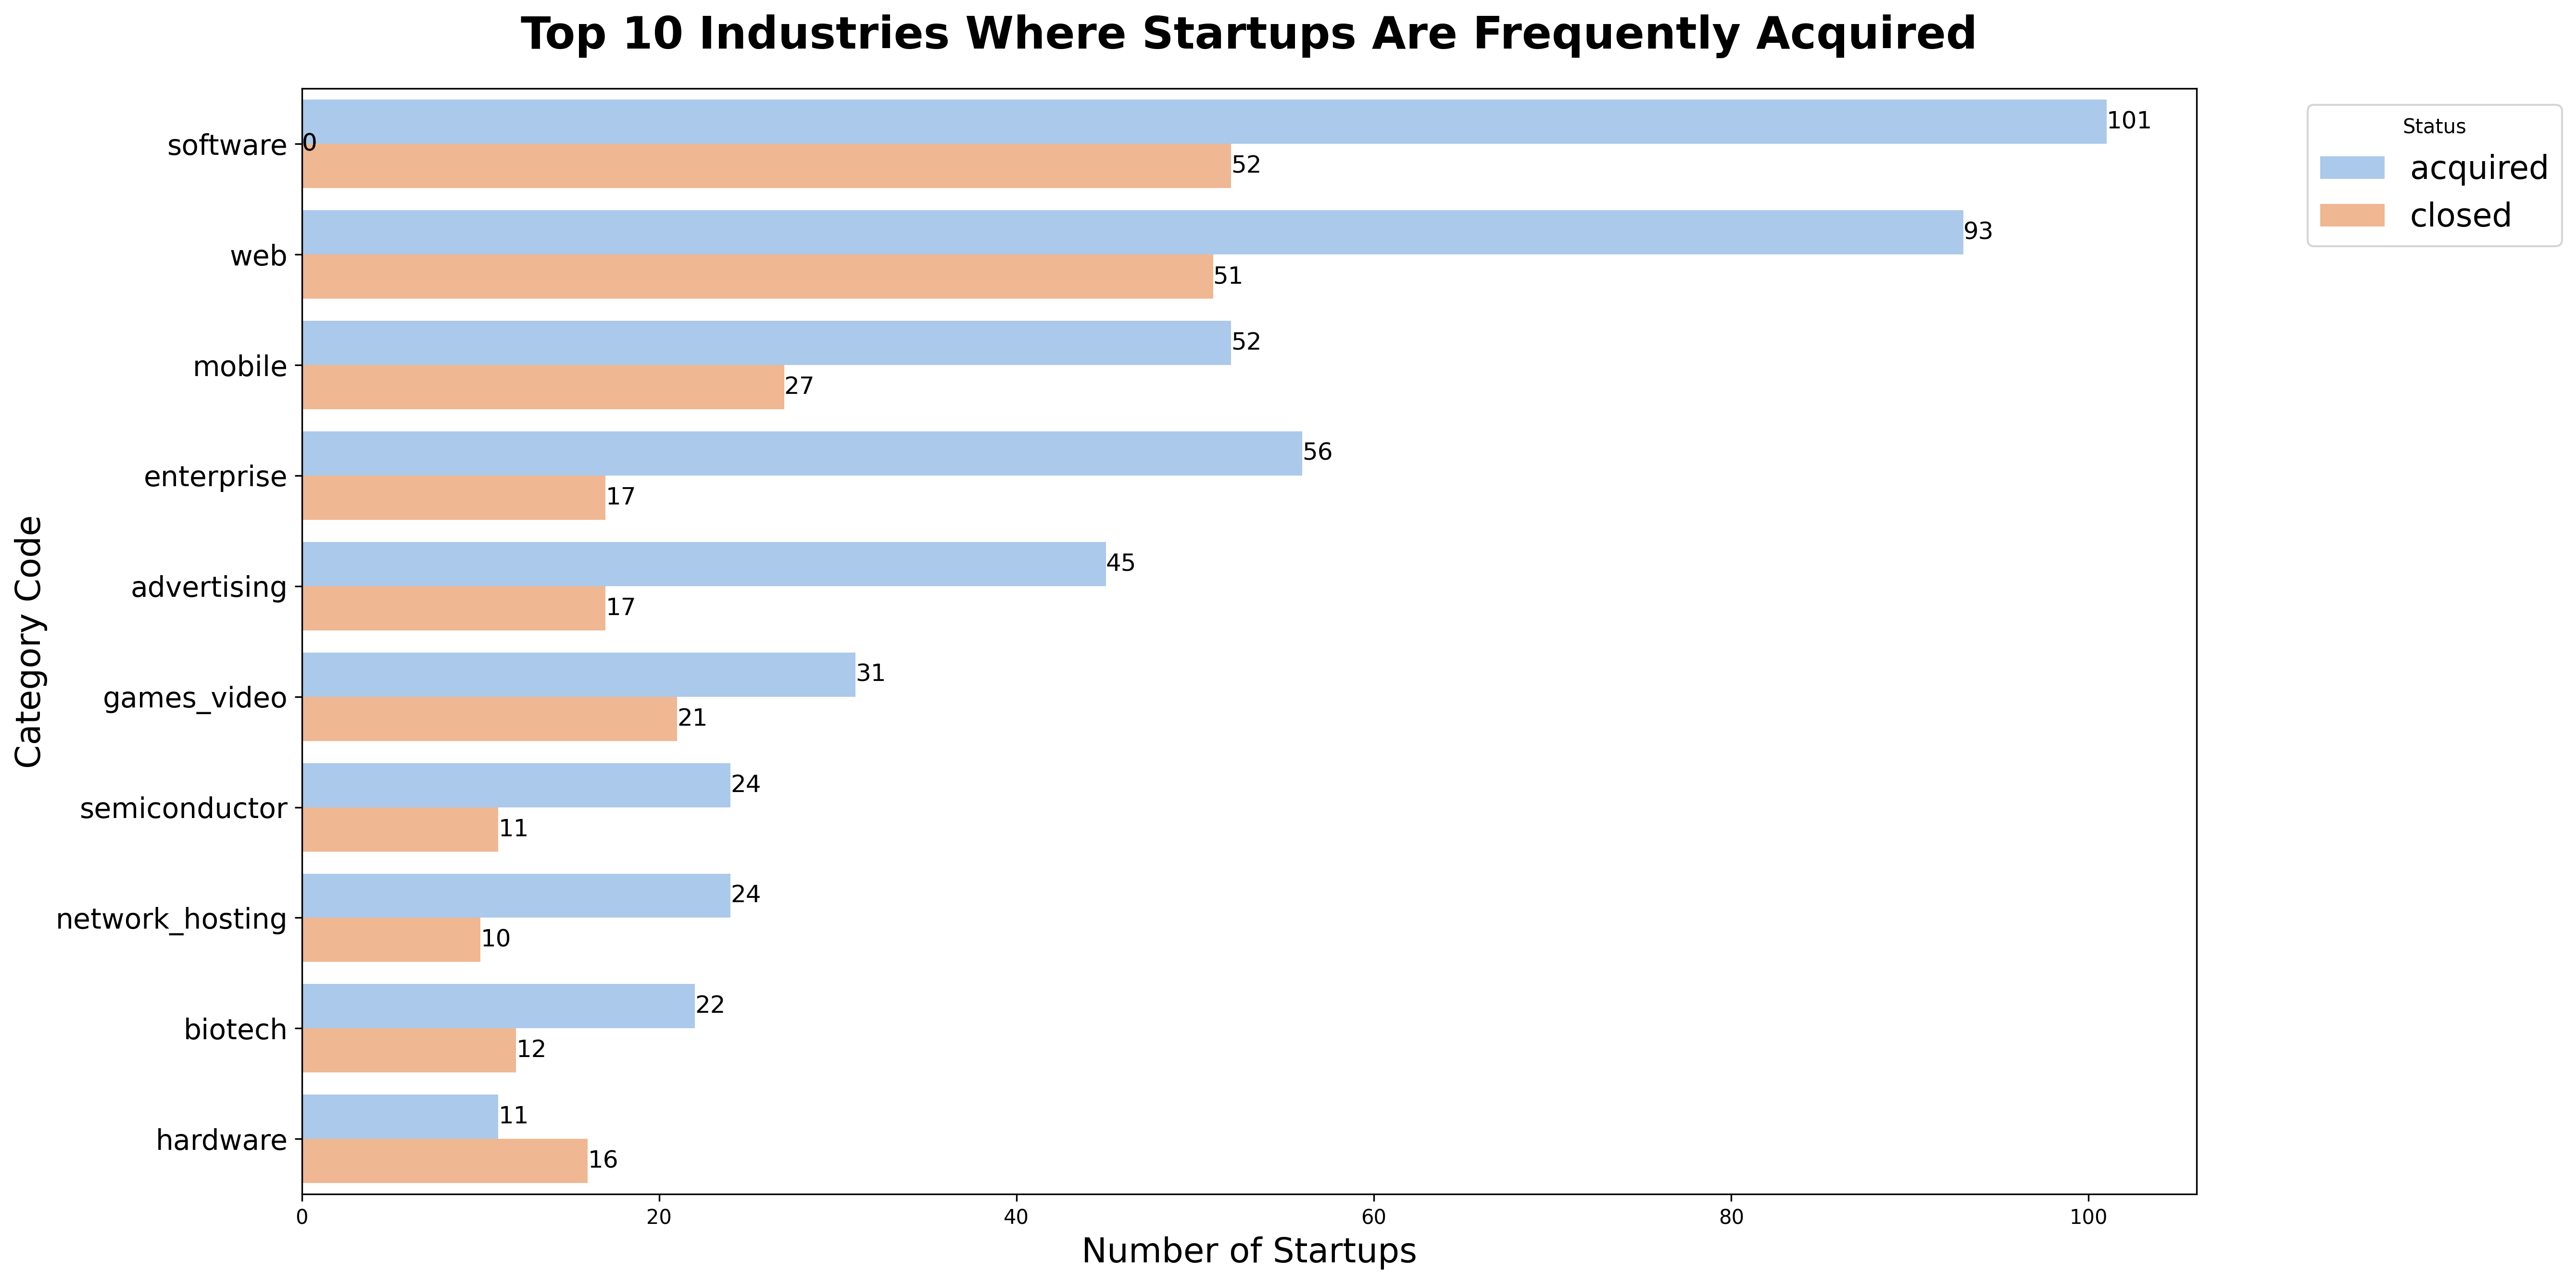

In [97]:
%matplotlib inline

# Getting the order of categories based on their frequency
# (now for y-axis since we are doing a horizontal bar plot)
order = categorical_data["category_code"].value_counts().index[:10]

# Create the countplot with horizontal bars
plt.figure(figsize=(18, 9), dpi=300)

# Specify the hue order explicitly
ax = sns.countplot(
    y="category_code", data=categorical_data, order=order, palette="pastel",
    hue='status', hue_order=['acquired', 'closed']
)

plt.title("Top 10 Industries Where Startups Are Frequently Acquired", fontsize=22, pad=20, fontweight='bold')
plt.xlabel("Number of Startups",fontsize=17)
plt.ylabel("Category Code", fontsize=17)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Set the font size of the category labels using tick_params
ax.tick_params(axis='y', labelsize=14) 

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and width of the bar
    bar_y = bar.get_y() + bar.get_height() / 2  # Y-coordinate of the center of the bar
    bar_width = bar.get_width()  # Width of the bar (count value)

    # Add text to the right end of the bar
    ax.text(bar_width, bar_y, f'{int(bar_width)}', 
            fontsize=12, color='black', ha='left', va='center')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()

As observed in the bar chart, we identify the following:

- The software industry not only has the highest number of startups but also sees a significant portion of these ventures being acquired by larger entities. 

- This trend highlights how the software industry's constant innovation and growth attracts big companies interested in new technologies or looking to grow their tech capabilities.

- Similarly, the web, mobile, and enterprise sectors emerge as vibrant ecosystems, containing many startups.

<!---
Rephrase
-->
Now that we know the top industries for startups, our next task is to examine time related factors. This will help us understand how time affects trends in startup acquisitions.

### Year of the highest number of startups founded

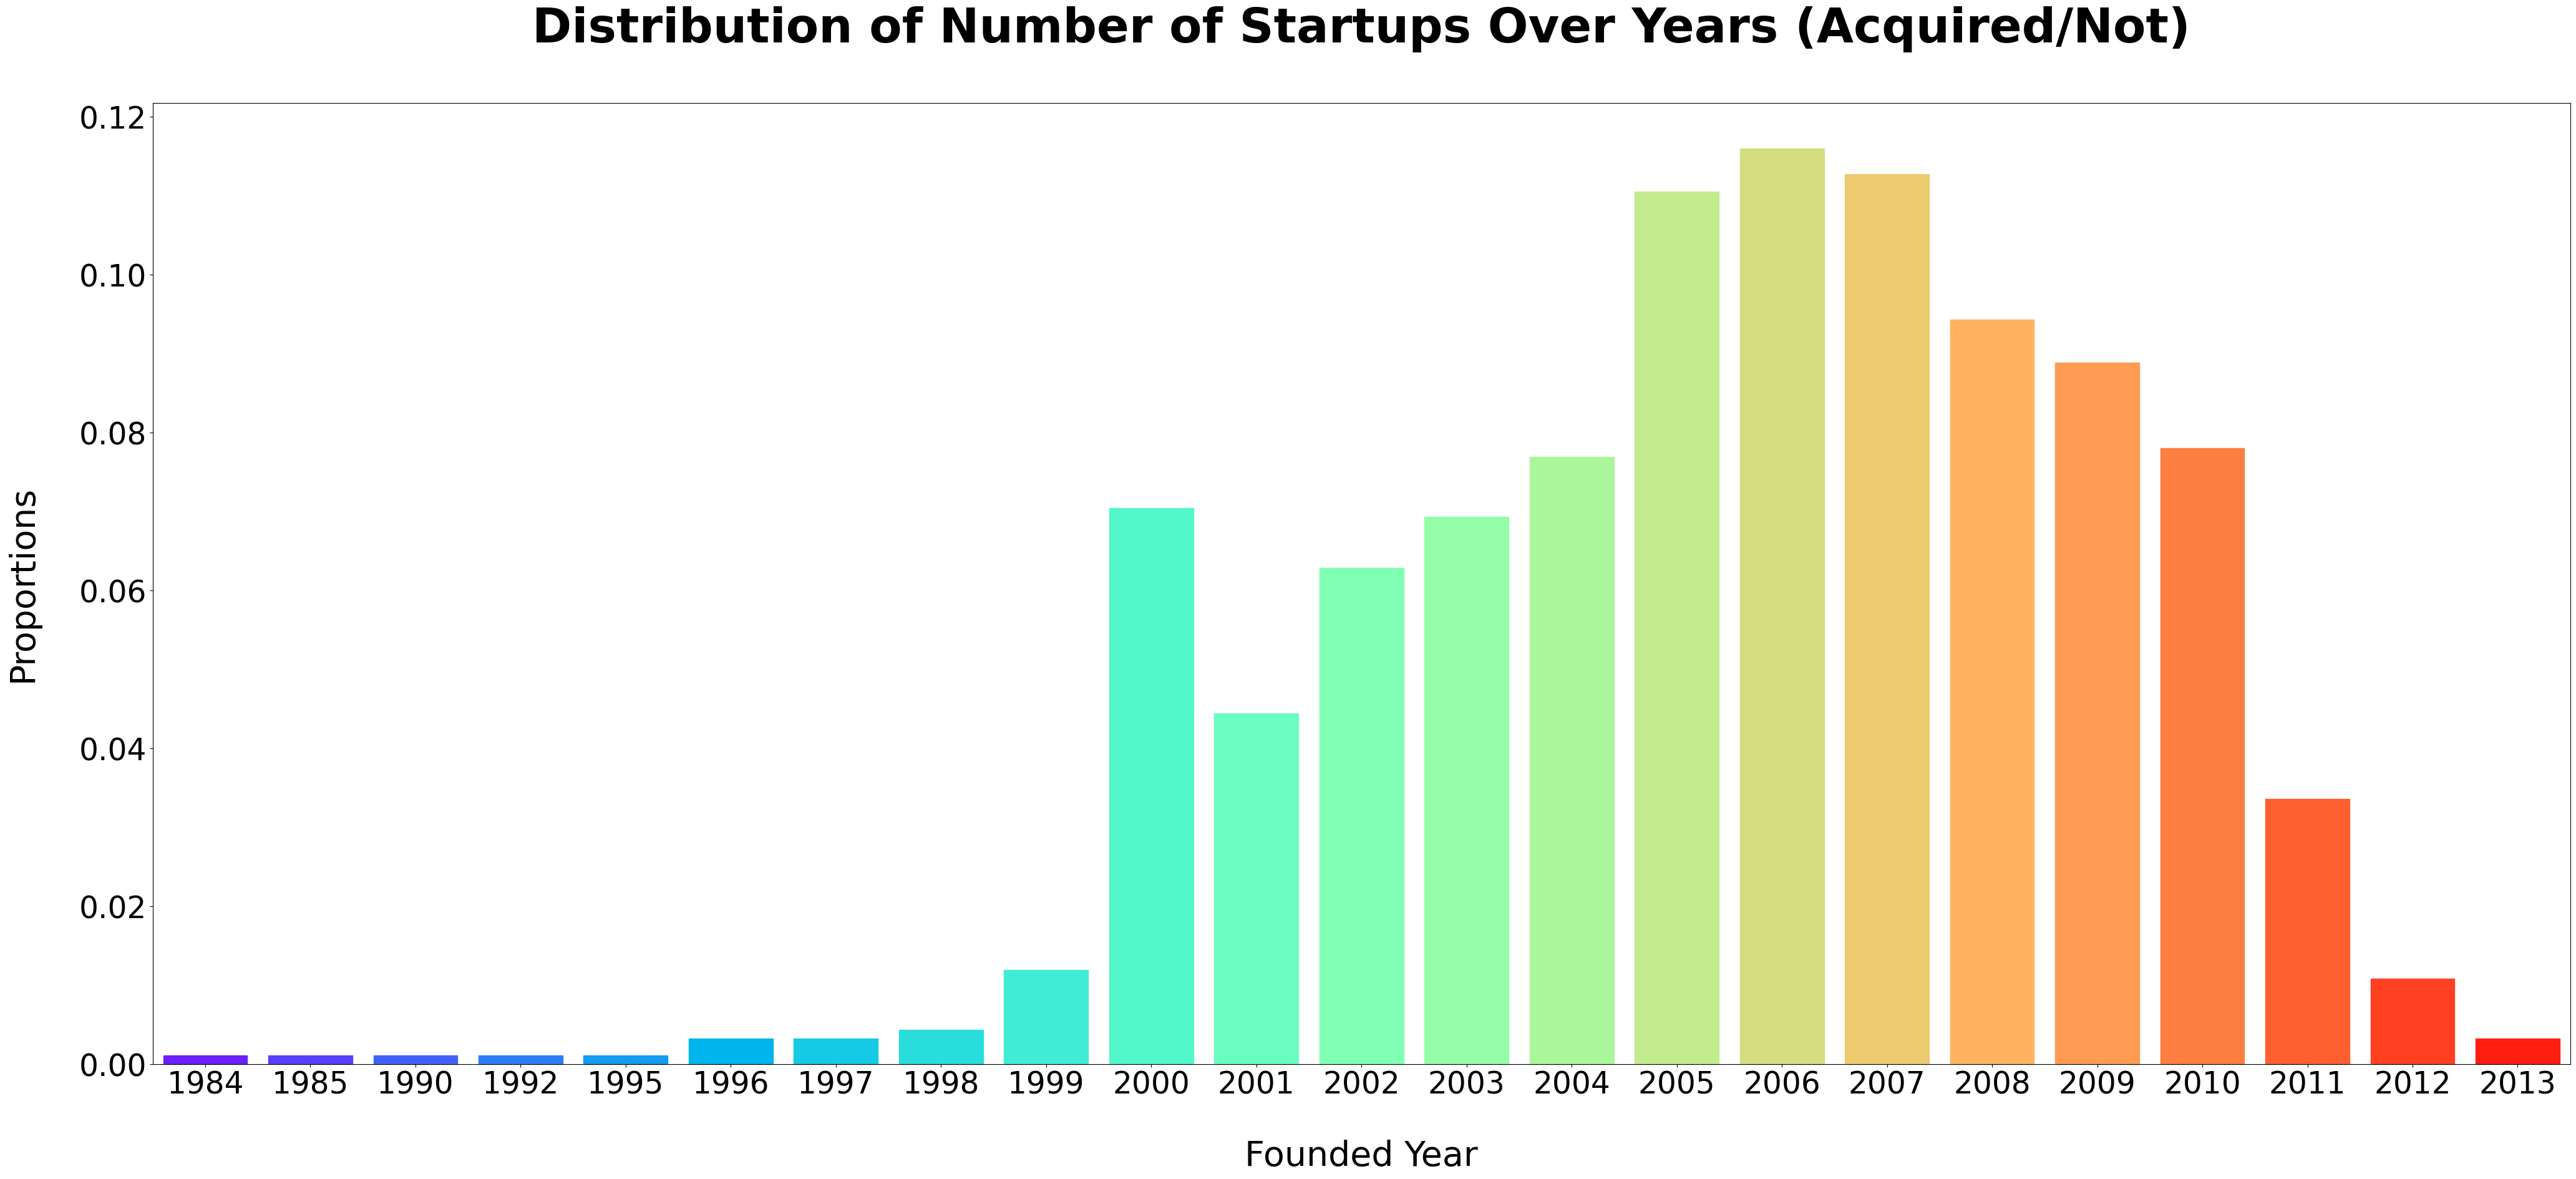

In [98]:
fig, ax = plt.subplots(figsize=(50, 20))
# Adjust the font size as needed
ax.tick_params(axis='x', labelsize=35)  

# Optionally, change the font size of the tick labels on the y-axis as well
ax.tick_params(axis='y', labelsize=35) 

ax.set_xlabel('Founded Year', fontsize=40,labelpad=45) 
ax.set_ylabel('Proportions', fontsize=40, labelpad=45)  
# Create a barplot without a hue parameter
barplot = sns.barplot(data=prop_df, x='founded_year', y='proportions')

# Manually set colors for each bar if you want them to be different
colors = sns.color_palette("rainbow", n_colors=len(prop_df['founded_year']))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

plt.title('Distribution of Number of Startups Over Years (Acquired/Not)',fontsize=55, pad=70, fontweight='bold')
plt.show()

Based on the visualization, we identify the following:

- Looking at the history of startups, we see a significant increase in activity up until 2007, indicating an era of rapid growth. The rise in startup activity during this era is probably connected to the rise of the internet and digital technologies.
  
- However, after 2007, there was a drop that could have been caused by the worldwide financial crisis, market saturation, economic declines, or changes in how investors act.

Let's go a head to explore how location influences startup success.

### Startup Acquisitions Across U.S. States

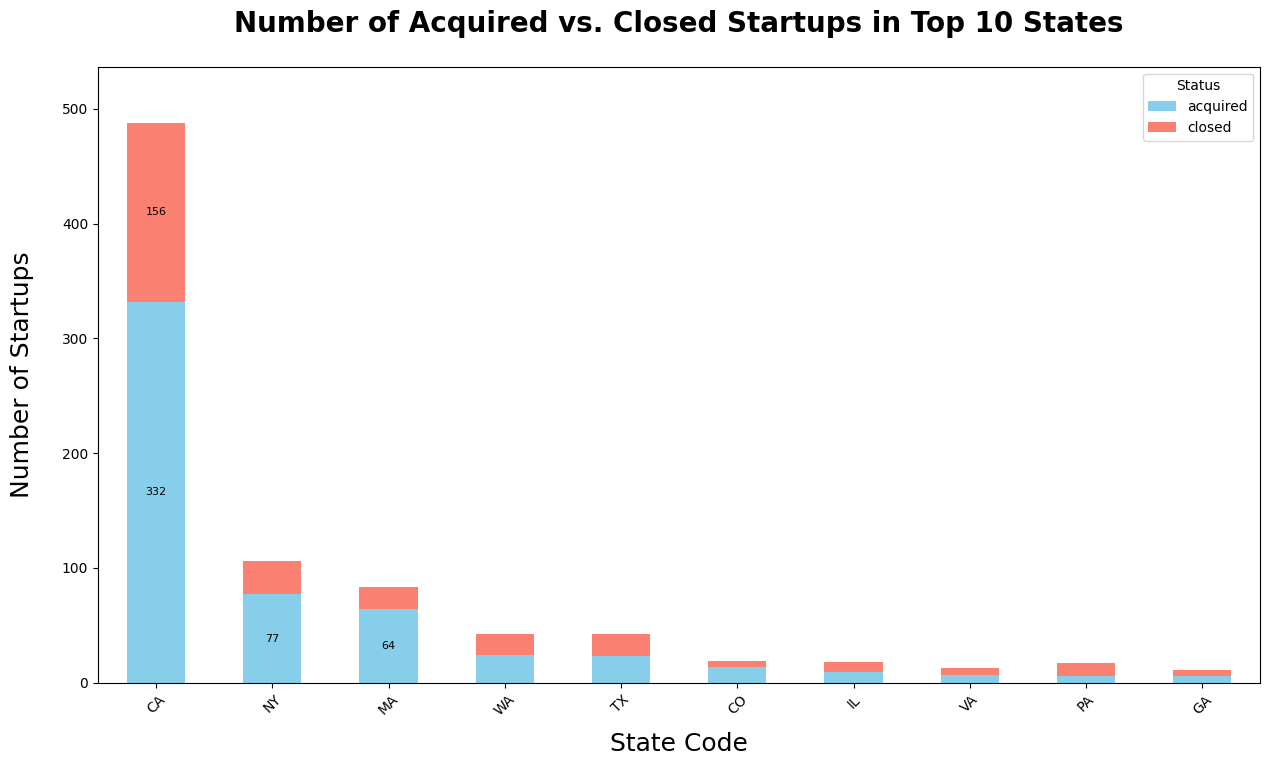

In [99]:
# Create the stacked bar chart
import matplotlib.pyplot as plt

grouped_data = categorical_data.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(10)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States',fontsize=20, pad=25, fontweight='bold')
plt.xlabel('State Code', fontsize=18,labelpad=10)
plt.ylabel('Number of Startups', fontsize=18,labelpad=20)
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

threshold = 50 

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  
plt.show()

The bar chart shows the following location trends:

- California (CA) stands out with the highest total number of startups, where the number of acquired startups is more than double the number closed.

- New York (NY) and Massachusetts (MA) also exhibit a pattern where more startups are being acquired than closed, suggesting a favorable startup environment in these states as well.
  
- In other states such as Washington (WA), Texas (TX), and Colorado (CO), the numbers of acquisitions and closures are closer, pointing to a more challenging environment.

### Factors correlated with startup acquisitions

Our objective is to understand the factors impacting the likelihood of a startup being acquired. To achieve this, we will use a correlation **Heatmap**.

Purpose of the visualization: 

- Provide a visual way to identify the variables that are highly correlated with the target `status`.

We will compare two correlation methods, Pearson's and Spearman,selecting just the features with the highest absolute correlation values.

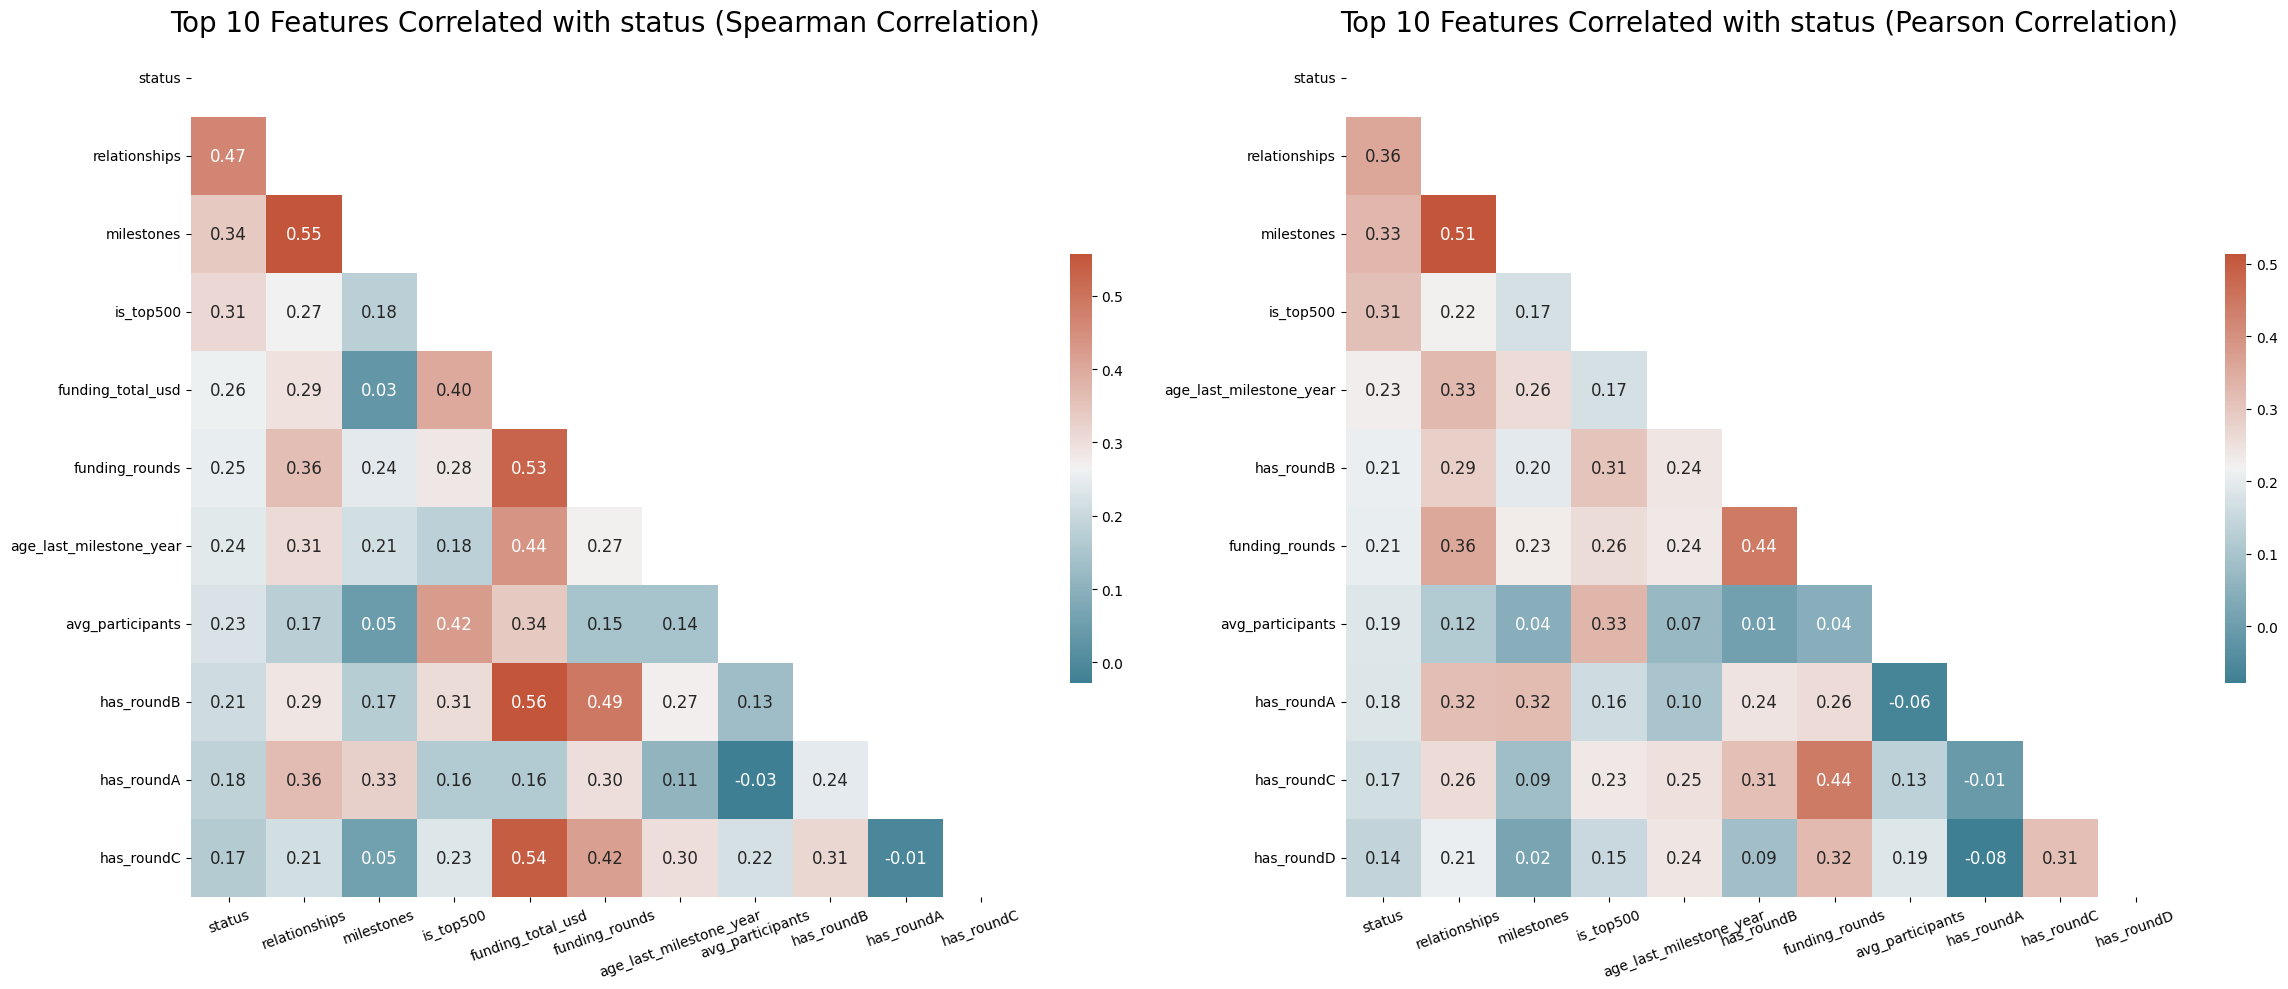

In [100]:
def draw_heatmaps_side_by_side(data_df, target='status'):
    """
    """
    # Ensure target is in DataFra
    if target not in data_df.columns:
        raise ValueError(f"Target '{target}' not found in DataFrame columns.")
    
    # Function to calculate and return top correlated features' correlation matrix
    def get_top_correlations(data_df, method):
        corr = data_df.corr(method=method)
        top_features = corr[target].abs().sort_values(ascending=False).head(11).index
        return corr.loc[top_features, top_features]
    
    # Calculate correlation matrices
    top_spearman_corr = get_top_correlations(data_df, 'spearman')
    top_pearson_corr = get_top_correlations(data_df, 'pearson')
    
    # Setup for dual heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))  
    cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Diverging color map
    
    # Draw heatmaps
    for ax, corr, title in zip(axes, [top_spearman_corr, top_pearson_corr], 
                               ['Spearman Correlation', 'Pearson Correlation']):
        sns.heatmap(corr, ax=ax, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 12},
                    cbar_kws={"shrink": .5}, mask=np.triu(np.ones_like(corr, dtype=bool)))
        ax.set_title(f'Top 10 Features Correlated with {target} ({title})', fontsize=20)
        ax.tick_params(axis='y', rotation=0)
        ax.tick_params(axis='x', rotation=20)
    
    plt.tight_layout()
    plt.show()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime64']
numerical_df_1 = data_df.select_dtypes(include=numerics)

draw_heatmaps_side_by_side(numerical_df_1)


Based on the heatmaps comparing Spearman and Pearson correlation coefficients for top features correlated with startup 'status,' we can conclude.
  
- The features `relationships`, `milestones` achieved well as the number of `funding rounds` consistently show a positive correlation with `status` in both methods, implying that are potentially important indicators of startup success.

Now that we have established their relationship, let's address each variable individually and proceed to explore the following key questions:

 ### Does the number of milestones achieved impact a startup's chance of getting acquired?

In [101]:
# Group your data by milestones and status and count the occurrences
grouped = data_df.groupby(["milestones", "status"]).size().reset_index(name="count")
grouped.columns = ["source", "target", "value"]
grouped['target'] = grouped['target'].map({0: 'closed', 1: 'acquired'})
grouped['source'] = grouped.source.map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 8: '8'})
links = pd.concat([grouped], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

# Convert links DataFrame to dictionary
links_dict = links.to_dict(orient='list')

# Apply the color map to the links
# Directly use the 'acquired' and 'closed' labels to determine the color
link_colors = ['rgba(144, 238, 144, 0.5)' if target == 'acquired' else 'rgba(255, 0, 0, 0.5)' for target in grouped['target']]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_source_target,
        color="white"
    ),
    link=dict(
        source=links_dict["source"],
        target=links_dict["target"],
        value=links_dict["value"],
        color=link_colors  # Apply the colors to the links
    )
)])

fig.update_layout(
    annotations=[
        dict(
            x=0.5,  # Set x to 0.5 for centering horizontally
            y=1.20,  # Adjust y as needed 
            text="Analyzing the Correlation: Milestones Achievement vs Startup Status",
            showarrow=False,
            font=dict(
                size=18,
                family="Arial, sans-serif"  
            ),
            textangle=0,  
            xref="paper",
            yref="paper"
        ),
        # Add a comma here after the closing brace of the first dictionary
        dict(
            x=-0.10,  # Position to the left of the diagram
            y=0.5,    # Vertically centered
            text="Milestones Achievement",  # Text for the left side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  
            xref="paper",
            yref="paper"
        ),
        dict(
            x=1.05,  # Position to the right of the diagram
            y=0.5,   
            text="Startup Status",  # Text for the right side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

The data indicates that startups achieving up to four milestones have a significantly higher likelihood of being acquired than those that dont.

-  Startups reaching 2-4 milestones have a higher chance of being acquired, emphasizing early success.

While the number of acquisitions decreases after reaching four milestones, the data consistently shows that achieving milestones positively influences a startup's likelihood of being acquired.
 
This trend reinforces the value of setting and reaching milestones as a strategy for startups aiming to get acquired and succeed in the industry

Having analyzed the significance of achieving milestones, let's now turn our attention to the types of investment.

### Do startups funded in rounds have a better chance of being acquired?

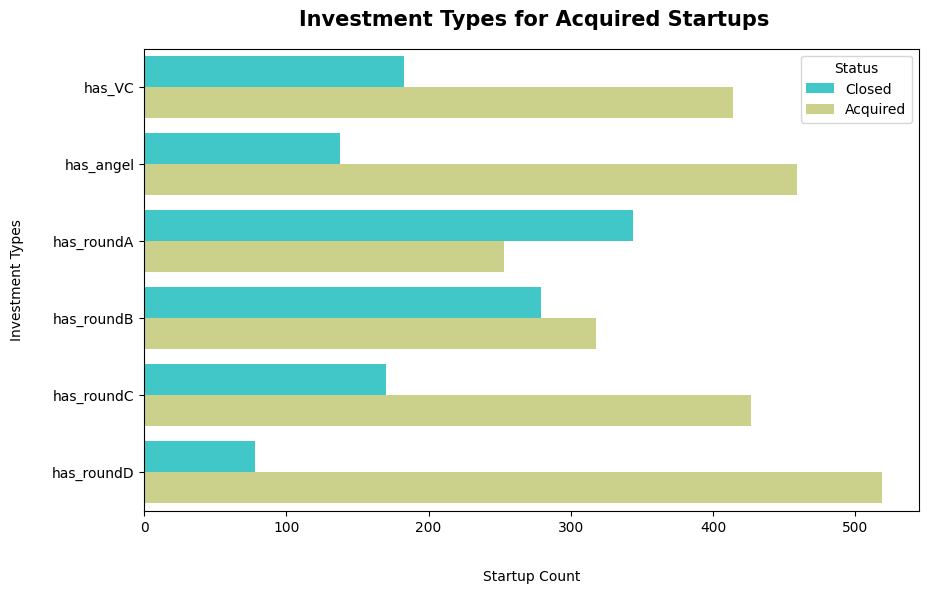

In [102]:
# Filter the DataFrame for entries with a status of 1
d = data_df.loc[data_df['status'] == 1]

# Select only the relevant binary columns
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Melt the DataFrame to long format for use with countplot
melted_f = pd.melt(f)

# Map the binary values to strings
melted_f['value'] = melted_f['value'].map({1: 'acquired', 0: 'closed'})

# Create the countplot with horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=melted_f, y='variable', hue='value', orient='h', palette="rainbow")

# Update the y-axis label with adjusted position
ax.set_ylabel("Investment Types", labelpad=20)  # Adjust labelpad for position
ax.set_xlabel("Startup Count", fontsize=10, labelpad=25)

# Create the title manually and adjust its position
ax.text(0.2, 1.05, "Investment Types for Acquired Startups", fontsize=15, transform=ax.transAxes, fontweight='bold')  # Adjust the x and y values

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Closed', 'Acquired'], title='Status')

plt.show()

It shows that the majority of startups that received round D funding were acquired rather than closed. 

Investments from venture capital (VC) and rounds A, B, and C are more commonly associated with startups that were acquired, suggesting these types of investments might be linked to a higher likelihood of success.

Now that we have confirm the importance of type of invesment is a factor for a startup to succed or not, let's analyse another variable that was highly correlated with our target.

 #### What's the average funding for acquired vs. closed startups?

In [103]:
# Define a list of pastel color codes
colors = ['#1f77b4', '#d62728']

# Filter out extreme outliers from the data
max_value = data_df['funding_total_usd'].quantile(0.99) 
filtered_data = data_df[data_df['funding_total_usd'] < max_value]

# Create a histogram with the filtered data
fig = px.histogram(data_frame=filtered_data, x='funding_total_usd', color='status',
                   labels={'funding_total_usd': 'Total Funding (USD in Millions)'},
                   color_discrete_sequence=colors)  
                   
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Total Funding : Acquired vs Closed Startups',
        'y': 0.95,  # You can adjust this for vertical position
        'x': 0.5,  # You can adjust this for horizontal position
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,
            'color': 'black',  # You can change the color if you want
            'family': 'Arial, sans-serif', # You can change the font family if you want
        },
    },
    xaxis_title='Total Funding (USD in Millions)',
    yaxis_title='Frequency',
)
# Format the x-axis tick labels to display values in millions
fig.update_xaxes(tickformat=".2s", exponentformat="none")

# Show the figure
fig.show()


/Users/gabrielaarzate/.virtualenvs/startup/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



From the histogram we can point the following: 

Most startups, whether acquired or closed, tend to have lower levels of total funding, with the likelihood of either acquisition or closure diminishing as funding amounts increase.

While it's not universally true for every startup, the pattern of increased funding correlating with reduced risk of acquisition or closure is commonly observed in the startup ecosystem.

##  Data-driven conclusions

After a depth analysis of the variables,  it's apparent that certain factors strongly influence the likelihood of startups being acquired. These include number of business relationships, number and timing of milestones reached, types of investment, alongside the historical record of fundings are significant factors to consider.

Data preprocessing played a key role in turning raw information into practical insights. Critical steps as imputation techniques, identifying negative and missing values and carefully addressing outliers provided meaningful and accurate information about the underlying patterns. 

Keeping in mind that every technique will be used differently depending on the nature of the data. 

Visual representations enable us to decode intricate relationships, recognize trends, and making it more accessible and intuitive for interpretation.

By following this workflow, a data analysis project becomes more manageable, efficient, and produces reliable results that can inform critical decisions in various domains, including startup success prediction.

## Ignore: What is next

Evaluating ML models and selecting the best-performing one is one of the main activities you do in pre-production. 

Hopefully, with this article, you’ve learned how to properly set up a model validation strategy and then how to choose a metric for your problem. 

You are ready to run a bunch of experiments and see what works. 

With that comes another problem of keeping track of experiment parameters, datasets used, configs, and results. 

And figuring out how to visualize and compare all of those models and results. 

For that, you may want to check out: